<a href="https://colab.research.google.com/github/Manish-k723/100-days-of-DL/blob/main/Object_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import zipfile
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

import warnings
warnings.filterwarnings('ignore')

from PIL import Image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import classification_report

In [ ]:
# from google.colab import files

# uploaded = files.upload()

In [ ]:
with zipfile.ZipFile("/content/train_data.zip", "r") as f:
    f.extractall("tool_images")

In [ ]:
images_data = 'tool_images/train_data' #consider changing the this variable according to your folder Structure
input_shape = (128, 128)
batch_size = 32

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [ ]:
%%time
train_generator = train_datagen.flow_from_directory(
    images_data,
    target_size=input_shape,
    batch_size=batch_size,
    class_mode='categorical'
)
#loading the data

Found 3093 images belonging to 5 classes.
CPU times: user 101 ms, sys: 33 ms, total: 134 ms
Wall time: 131 ms


In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(input_shape[0], input_shape[1], 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(train_generator.class_indices), activation='softmax') #Using softmax as this is a multi-class classification problem
])

In [ ]:
%%time
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_generator, epochs=10) #Change number of Epochs for better performance

Epoch 1/10
97/97 [==============================] - 135s 1s/step - loss: 1.4179 - accuracy: 0.4481
Epoch 2/10
97/97 [==============================] - 132s 1s/step - loss: 1.2600 - accuracy: 0.5189
Epoch 3/10
97/97 [==============================] - 131s 1s/step - loss: 1.1462 - accuracy: 0.5626
Epoch 4/10
97/97 [==============================] - 132s 1s/step - loss: 1.0637 - accuracy: 0.5962
Epoch 5/10
97/97 [==============================] - 146s 2s/step - loss: 1.0121 - accuracy: 0.6227
Epoch 6/10
97/97 [==============================] - 142s 1s/step - loss: 0.9583 - accuracy: 0.6382
Epoch 7/10
97/97 [==============================] - 132s 1s/step - loss: 0.8961 - accuracy: 0.6757
Epoch 8/10
97/97 [==============================] - 128s 1s/step - loss: 0.8414 - accuracy: 0.6954
Epoch 9/10
97/97 [==============================] - 128s 1s/step - loss: 0.8154 - accuracy: 0.6977
Epoch 10/10
97/97 [==============================] - 127s 1s/step - loss: 0.7564 - accuracy: 0.7200
CPU times

1/1 [==============================] - 0s 39ms/step
Predicted class: Hammer
1/1 [==============================] - 0s 43ms/step
Predicted class: Tool box


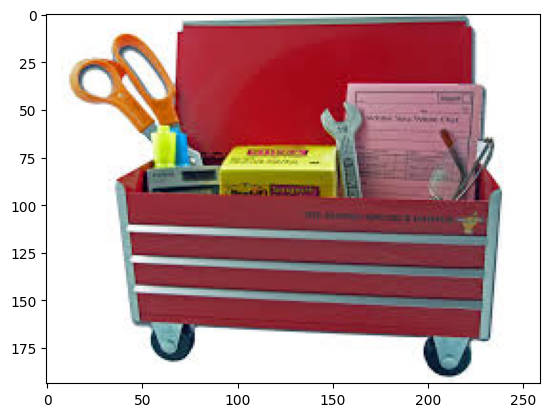

In [ ]:
# Test the model on a few images from the training set
sample_images = [
    '/content/tool_images/train_data/Hammer/000002.jpg',
    '/content/tool_images/train_data/Tool box/000053.jpg'
]

for image_path in sample_images:
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=input_shape)
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions)
    class_labels = list(train_generator.class_indices.keys())
    # print(f"Image: {image_path}")
    plt.imshow(Image.open(image_path))
    print(f"Predicted class: {class_labels[predicted_class]}")